In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:\Users\sijan\Desktop\eda_using_basic_data_functions_in_python_dataset1.csv")

In [3]:
df.head()

,date,number_of_strikes,center_point_geom
0,2018-01-03,194,POINT(-75 27)
1,2018-01-03,41,POINT(-78.4 29)
2,2018-01-03,33,POINT(-73.9 27)
3,2018-01-03,38,POINT(-73.8 27)
4,2018-01-03,92,POINT(-79 28)


In [4]:
# Convert date column to datetime
df['date']= pd.to_datetime(df['date'])

In [5]:
# Calculate days with most lightning strikes.
df.groupby('date')['number_of_strikes'].sum().sort_values(ascending=False).head(10)

date
2018-08-29    1070457
2018-08-17     969774
2018-08-28     917199
2018-08-27     824589
2018-08-30     802170
2018-08-19     786225
2018-08-18     741180
2018-08-16     734475
2018-08-31     723624
2018-08-15     673455
Name: number_of_strikes, dtype: int64

In [6]:
# Create a new `month` column
df['month'] = df['date'].dt.month
df.head()

,date,number_of_strikes,center_point_geom,month
0,2018-01-03,194,POINT(-75 27),1
1,2018-01-03,41,POINT(-78.4 29),1
2,2018-01-03,33,POINT(-73.9 27),1
3,2018-01-03,38,POINT(-73.8 27),1
4,2018-01-03,92,POINT(-79 28),1


In [7]:
# Calculate total number of strikes per month

df.groupby(df['month']).agg({'number_of_strikes': 'sum'}).sort_values('number_of_strikes', ascending=False).head(12)

,number_of_strikes
month,
8,15525255
7,8320400
6,6445083
5,4166726
9,3018336
2,2071315
4,1524339
10,1093962
1,860045


In [8]:
# Create a new `month_txt` column.
df['month_txt'] = df['date'].dt.month_name().str.slice(stop=3)
df.head()

,date,number_of_strikes,center_point_geom,month,month_txt
0,2018-01-03,194,POINT(-75 27),1,Jan
1,2018-01-03,41,POINT(-78.4 29),1,Jan
2,2018-01-03,33,POINT(-73.9 27),1,Jan
3,2018-01-03,38,POINT(-73.8 27),1,Jan
4,2018-01-03,92,POINT(-79 28),1,Jan


In [9]:
# Create a new helper dataframe for plotting.
df_by_month = df.groupby(['month','month_txt']).agg({'number_of_strikes':'sum'}).sort_values('month', ascending=True).head(12).reset_index()
df_by_month

,month,month_txt,number_of_strikes
0,1,Jan,860045
1,2,Feb,2071315
2,3,Mar,854168
3,4,Apr,1524339
4,5,May,4166726
5,6,Jun,6445083
6,7,Jul,8320400
7,8,Aug,15525255
8,9,Sep,3018336
9,10,Oct,1093962


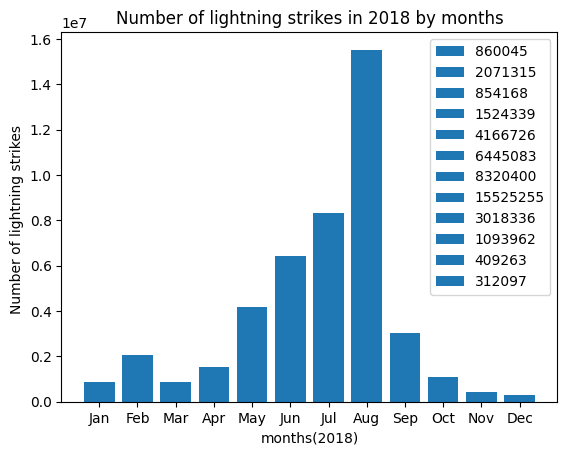

In [10]:
#now let's plot a bar graph 
plt.bar(x=df_by_month['month_txt'],height=df_by_month['number_of_strikes'],label=df_by_month['number_of_strikes'])
plt.plot()
plt.xlabel('months(2018)')
plt.ylabel("Number of lightning strikes ")
plt.title("Number of lightning strikes in 2018 by months")
plt.legend()
plt.show()

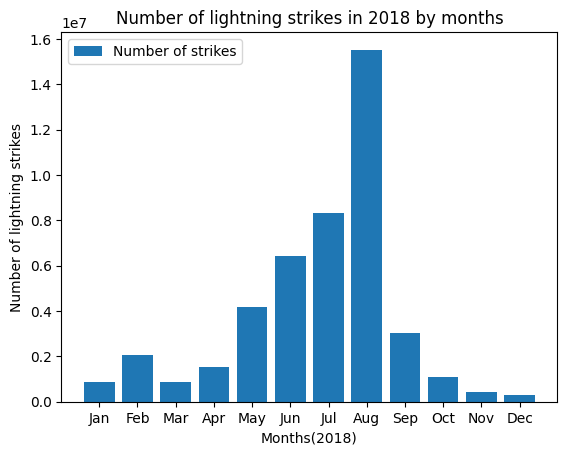

In [11]:
plt.bar(x=df_by_month['month_txt'],height= df_by_month['number_of_strikes'], label="Number of strikes")
plt.plot()

plt.xlabel("Months(2018)")
plt.ylabel("Number of lightning strikes")
plt.title("Number of lightning strikes in 2018 by months")
plt.legend()

## Date string manipulation
let's create four new columns: week, month, quarter, and year. we can do this by using the datetime.strftime() method of your datetime object. strftime is short for "string format time." we will use this method on the datetime data in the week column, and it will extract the information you specify, formatted as a string.

In [ ]:
#let's create four new columns 
df['date'] = pd.to_datetime(df['date'])

df['week'] = df['date'].dt.strftime('%Y-W%V')
df['month'] = df['date'].dt.strftime('%Y-%m')
df['quarter'] = df['date'].dt.to_period('Q').dt.strftime('%Y-Q%q')
df['year'] = df['date'].dt.strftime('%Y')

In [ ]:
df.head(10)


In [ ]:
print("hello")

## unicorns

In [3]:



unicorn=pd.read_csv(r"C:\Users\sijan\Downloads\Unicorn_Companies.csv")
unicorn.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,4/7/17,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,12/1/12,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,7/3/18,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,1/23/14,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,12/12/11,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


In [4]:
unicorn.size

10740

In [5]:
unicorn.shape

(1074, 10)

In [ ]:
unicorn.info()

In [6]:
unicorn.describe()

,Year Founded
count,1074.000000
mean,2012.895717
std,5.698573
min,1919.000000
25%,2011.000000
50%,2014.000000
75%,2016.000000
max,2021.000000


The minimum value in the Year Founded column is 1919. This means that this dataset does not contain data on unicorn companies founded before 1919.
The maximum value in the Year Founded column is 2021. This means that this dataset does not include data on unicorn companies founded after 2021.

In [7]:
unicorn['Date Joined']=pd.to_datetime(unicorn['Date Joined'])


C:\Users\sijan\AppData\Local\Temp\ipykernel_6028\4034375507.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  unicorn['Date Joined']=pd.to_datetime(unicorn['Date Joined'])


In [8]:
unicorn['Year Joined']=unicorn['Date Joined'].dt.year


It is not necessary to take a sample of the data in order to conduct the visualizations and EDA that follow. But you may encounter scenarios in the future where you will need to take a sample of the data due to time and resource limitations. For the purpose of developing your skills around sampling, take a sample of the data and work with that sample for the next steps of analysis you want to conduct. Use the sample() function for this task.

In [9]:
#taking sample data
unicorn_sample=unicorn.sample(n=50,random_state=42)

In [10]:
unicorn.head(7)

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",2017
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",2018
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",2014
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",2011
5,Canva,$40B,2018-01-08,Internet software & services,Surry Hills,Australia,Oceania,2012,$572M,"Sequoia Capital China, Blackbird Ventures, Mat...",2018
6,Checkout.com,$40B,2019-05-02,Fintech,London,United Kingdom,Europe,2012,$2B,"Tiger Global Management, Insight Partners, DST...",2019


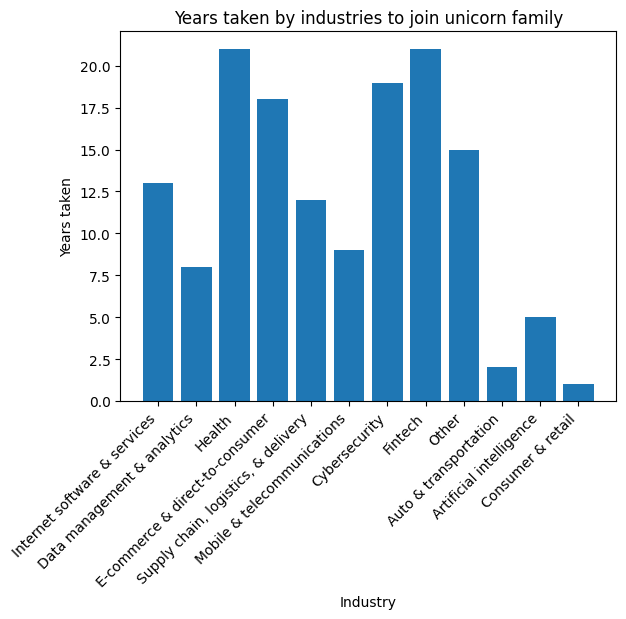

In [11]:
#let's make a bar graph
# Creating bar plot
# with Industry column as the categories of the bars
# and the difference in years between Year Joined column and Year Founded column as the heights of the bars
plt.bar(unicorn_sample['Industry'],unicorn_sample['Year Joined']-unicorn_sample['Year Founded'])
plt.title("Years taken by industries to join unicorn family")
plt.xlabel("Industry")
plt.ylabel("Years taken")
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

In [18]:
1+2